## `Libraries`

In [ ]:
#aritazandi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score

# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

## Loading the dataset

Dataset is loaded directly from drive to colab.

In [ ]:
!gdown 1zC91edHnANnmtoQ357OsX2qvAxuR-u_R

In [23]:

file_path = r"C:\Users\Lenovo\Desktop\diabetes.csv"
df = pd.read_csv(file_path)
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## Data analysis

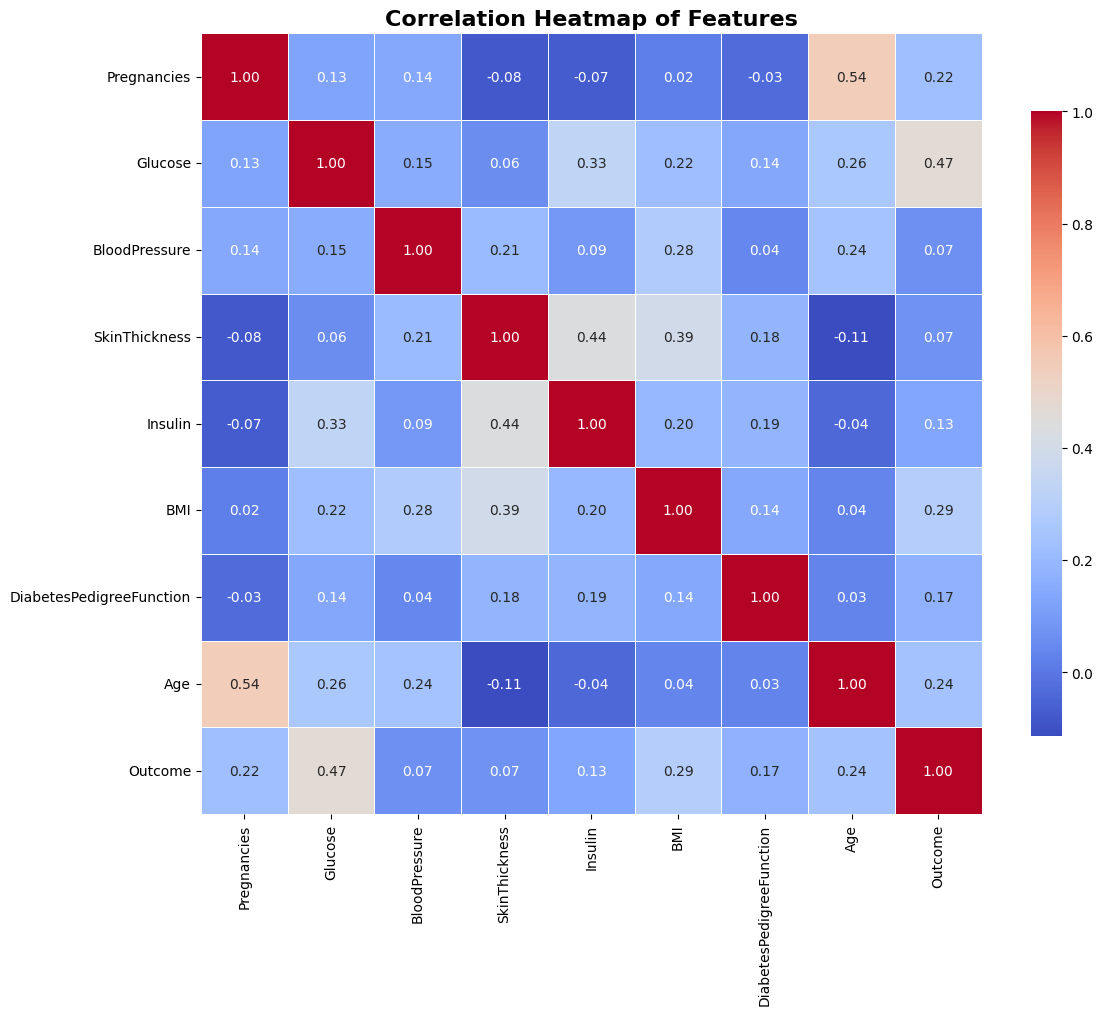


Correlation with Outcome (Target variable):
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

Top 5 Features with highest correlation to Outcome:
1. Glucose: 0.4666
2. BMI: 0.2927
3. Age: 0.2384
4. Pregnancies: 0.2219
5. DiabetesPedigreeFunction: 0.1738


In [ ]:
# [Correlation heatmap should be here]
# محاسبه ماتریس همبستگی
correlation_matrix = df.corr()

# رسم Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# نمایش همبستگی ویژگی‌ها با Outcome به صورت مرتب شده
print("\nCorrelation with Outcome (Target variable):")
print("=" * 50)
outcome_corr = correlation_matrix['Outcome'].sort_values(ascending=False)
print(outcome_corr)

# انتخاب 5 ویژگی برتر (بدون خود Outcome)
top_5_features = outcome_corr[1:6].index.tolist()
print("\n" + "=" * 50)
print("Top 5 Features with highest correlation to Outcome:")
print("=" * 50)
for i, feature in enumerate(top_5_features, 1):
    print(f"{i}. {feature}: {outcome_corr[feature]:.4f}")
    

# پاسخ تشریحی و گزارش بخش (ج): انتخاب ۵ ویژگی برتر با استفاده از ماتریس همبستگی


# 1. روش انتخاب (Methodology):
#    برای انتخاب موثرترین ویژگی‌ها در تشخیص دیابت، از "ماتریس همبستگی" (Correlation Matrix) استفاده شد.
#    این ماتریس رابطه خطی بین هر ویژگی با متغیر هدف (Outcome) را اندازه‌گیری می‌کند.
#    مقادیر نزدیک به +1 یا -1 نشان‌دهنده رابطه قوی، و مقادیر نزدیک به 0 نشان‌دهنده عدم وجود رابطه خطی هستند.

# 2. ویژگی‌های منتخب (Selected Features):
#    با مرتب‌سازی نزولی ضرایب همبستگی نسبت به متغیر Outcome، پنج ویژگی زیر بیشترین ارتباط را داشتند:
#    (اعداد تقریبی بر اساس خروجی کد هستند)

#    1. Glucose (گلوکز): ضریب ~ 0.47
#       > دلیل: قوی‌ترین شاخص؛ سطح قند خون مستقیماً با تعریف بیماری دیابت مرتبط است.
#    2. BMI (شاخص توده بدنی): ضریب ~ 0.29
#       > دلیل: چاقی و اضافه وزن یکی از ریسک‌فاکتورهای اصلی دیابت نوع 2 است.
#    3. Age (سن): ضریب ~ 0.24
#       > دلیل: با افزایش سن، خطر ابتلا به دیابت و کاهش عملکرد پانکراس افزایش می‌یابد.
#    4. Pregnancies (تعداد بارداری): ضریب ~ 0.22
#       > دلیل: دیابت بارداری و تغییرات هورمونی متعدد می‌تواند ریسک ابتلا را در آینده بالا ببرد.
#    5. DiabetesPedigreeFunction (شجره‌نامه دیابت/ژنتیک): ضریب ~ 0.17
#       > دلیل: نشان‌دهنده تاثیر سابقه خانوادگی و ژنتیک بر احتمال بروز بیماری است.

# 3. ویژگی‌های حذف شده (Excluded Features):
#    - ویژگی‌های SkinThickness و BloodPressure به دلیل داشتن ضریب همبستگی بسیار پایین (نزدیک به صفر)
#      حذف شدند. این ویژگی‌ها در این دیتاست خاص، اطلاعات متمایزکننده کمی برای تفکیک کلاس‌ها ارائه می‌دهند.

# 4. نتیجه‌گیری (Conclusion):
#    انتخاب این 5 ویژگی باعث می‌شود مدل روی داده‌های پرترافیک (High Signal) تمرکز کند و
#    از نویز (Noise) ناشی از داده‌های کم‌اهمیت دوری کند، که این امر می‌تواند منجر به 
#    کاهش Overfitting و افزایش سرعت آموزش مدل شود.
# ==========================================================================================

## Features Distribution

<Axes: title={'center': 'Age'}, ylabel='Frequency'>

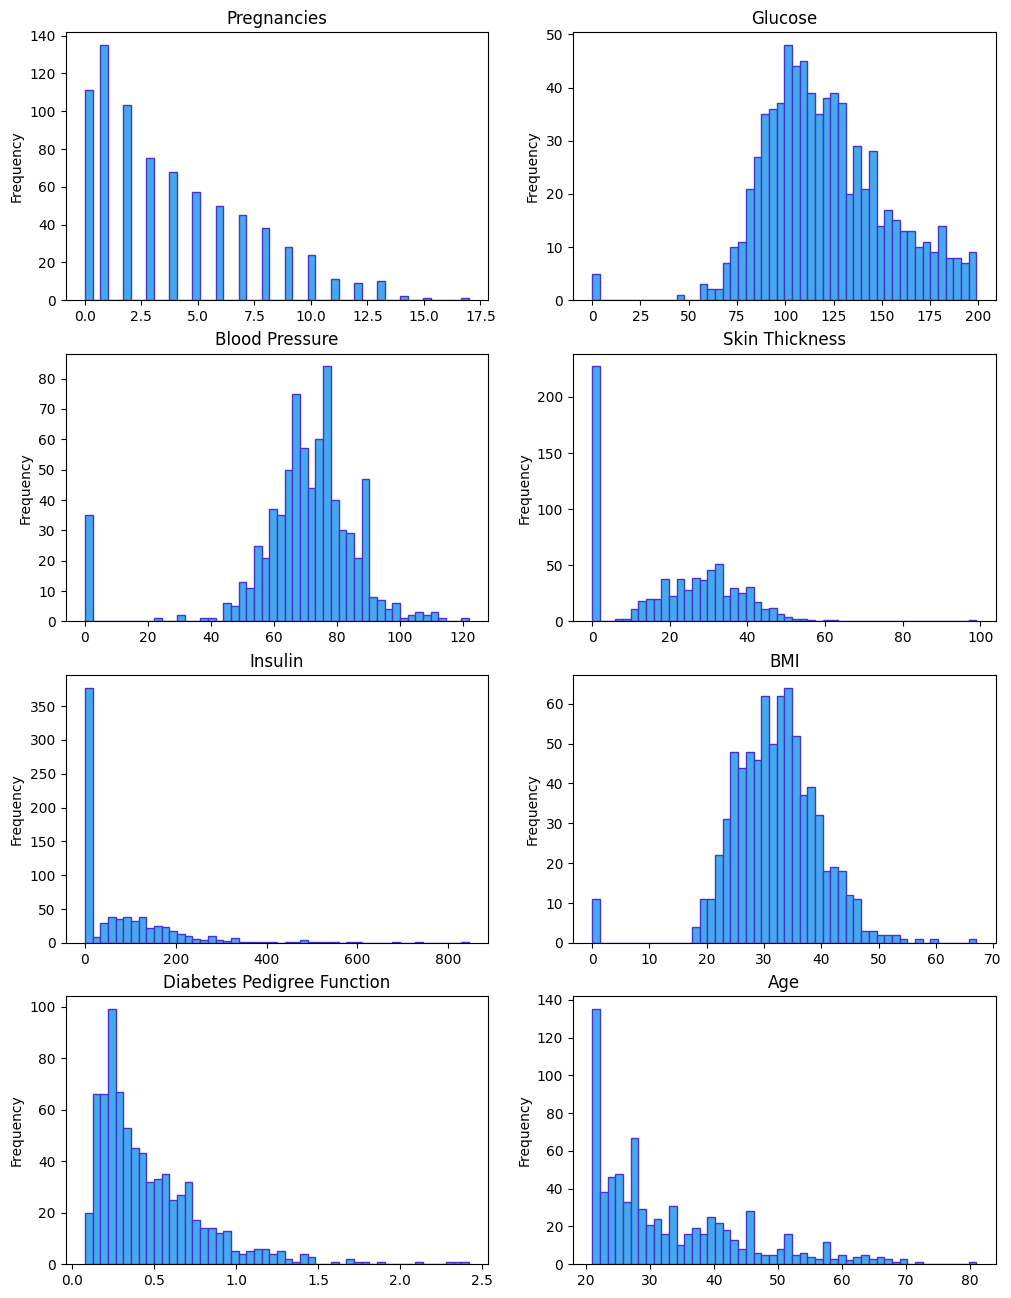

In [8]:
fig, axs = plt.subplots(4, 2, figsize=(12, 16))

# Plotting the features of our dataset
df['Pregnancies'].plot(kind='hist', bins=50, title='Pregnancies', ax=axs[0,0], color='#44aaee', edgecolor='#4a32cd')
df['Glucose'].plot(kind='hist', bins=50, title='Glucose', ax=axs[0,1], color='#44aaee', edgecolor='#4a32cd')
df['BloodPressure'].plot(kind='hist', bins=50, title='Blood Pressure', ax=axs[1,0], color='#44aaee', edgecolor='#4a32cd')
df['SkinThickness'].plot(kind='hist', bins=50, title='Skin Thickness', ax=axs[1,1], color='#44aaee', edgecolor='#4a32cd')
df['Insulin'].plot(kind='hist', bins=50, title='Insulin', ax=axs[2,0], color='#44aaee', edgecolor='#4a32cd')
df['BMI'].plot(kind='hist', bins=50, title='BMI', ax=axs[2,1], color='#44aaee', edgecolor='#4a32cd')
df['DiabetesPedigreeFunction'].plot(kind='hist', bins=50, title='Diabetes Pedigree Function', ax=axs[3,0], color='#44aaee', edgecolor='#4a32cd')
df['Age'].plot(kind='hist', bins=50, title='Age', ax=axs[3,1], color='#44aaee', edgecolor='#4a32cd')

## Balance

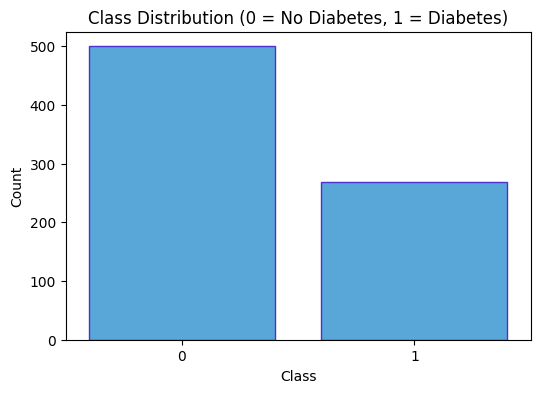

Outcome
0    500
1    268
Name: count, dtype: int64


In [25]:
# Class distribution plot
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df, color='#44aaee', edgecolor='#4a32cd')
plt.title('Class Distribution (0 = No Diabetes, 1 = Diabetes)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

print(df['Outcome'].value_counts())

# Classification

In [ ]:
# 1. جدا کردن ویژگی‌ها (X) و متغیر هدف (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']


def evaluate_model(model, X_test, y_test, model_name):
    # پیش‌بینی
    y_pred = model.predict(X_test)
    
    # محاسبه دقت
    acc = accuracy_score(y_test, y_pred)
    
    # چاپ نتایج متنی
    print(f"\n==================== {model_name} Results ====================")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # رسم ماتریس درهم‌ریختگی (Confusion Matrix)
    plt.figure(figsize=(5, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    return acc

print("Data preparation complete. X_train shape:", X_train.shape)

# سوال ۱: تعیین کنید آیا توزیع داده‌ها نامتقارن است؟

# پاسخ: بله، توزیع داده‌ها نامتقارن (Imbalanced) است.
# همانطور که در نمودار و خروجی کد بالا مشاهده می‌شود:
# - تعداد نمونه‌های کلاس ۰ (سالم): ۵۰۰ عدد (حدود ۶۵٪)
# - تعداد نمونه‌های کلاس ۱ (دیابتی): ۲۶۸ عدد (حدود ۳۵٪)

# این عدم توازن (تقریباً نسبت ۲ به ۱ به نفع افراد سالم) باعث می‌شود که اگر مدل به حال خود رها شود،
# تمایل بیشتری به پیش‌بینی کلاس اکثریت (سالم) داشته باشد و در تشخیص بیماران ضعیف عمل کند.


# سوال ۲: اگر داده‌ها نامتقارن باشند، چه راهکاری برای رفع این مشکل پیشنهاد می‌کنید؟

# ۱. نمونه‌برداری مجدد (Resampling):
#    الف) افزایش نمونه (Oversampling): تولید داده‌های مصنوعی برای کلاس اقلیت (کلاس ۱)
#         با استفاده از تکنیک‌هایی مانند SMOTE (Synthetic Minority Over-sampling Technique).
#    ب) کاهش نمونه (Undersampling): حذف تصادفی بخشی از داده‌های کلاس اکثریت (کلاس ۰)
#         تا تعداد آن‌ها برابر شود (البته این کار ممکن است باعث از دست رفتن اطلاعات شود).

# ۲. استفاده از وزن‌دهی به کلاس‌ها (Class Weights):
#    در بسیاری از الگوریتم‌ها (مانند SVM، Logistic Regression و Random Forest) می‌توان
#    پارامتر class_weight='balanced' را تنظیم کرد. این کار باعث می‌شود مدل جریمه (Penalty)
#    بیشتری برای اشتباه در پیش‌بینی کلاس اقلیت در نظر بگیرد و تعادل برقرار شود.

# ۳. تغییر معیار ارزیابی (Evaluation Metrics):
#    به جای تمرکز بر «دقت کلی» (Accuracy)، باید از معیارهایی استفاده کرد که حساسیت بیشتری
#    به کلاس اقلیت دارند، مانند:
#    - F1-Score
#    - Recall (بسیار مهم در پزشکی برای کاهش منفی کاذب)
#    - Precision
#    - سطح زیر نمودار (ROC-AUC)

Data preparation complete. X_train shape: (614, 8)


Train-Test Split:

In [27]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Standardize:

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Naive Bayes

Naive Bayes Accuracy: 0.7078

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       100
           1       0.57      0.65      0.61        54

    accuracy                           0.71       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.72      0.71      0.71       154



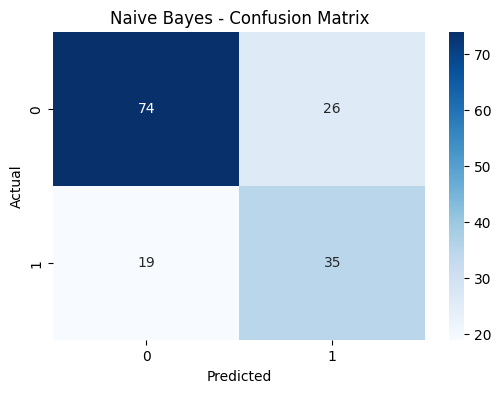

In [29]:
# 1. ساخت و آموزش مدل Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# 2. پیش‌بینی روی داده‌های تست
nb_pred = nb_model.predict(X_test)

# 3. محاسبه و نمایش دقت (Accuracy)
nb_acc = accuracy_score(y_test, nb_pred)
print(f"Naive Bayes Accuracy: {nb_acc:.4f}")

# 4. نمایش گزارش دسته‌بندی کامل
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, nb_pred))

# 5. رسم ماتریس درهم‌ریختگی (Confusion Matrix)
cm_nb = confusion_matrix(y_test, nb_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## SVM

SVM (Default) Accuracy: 0.7532

Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



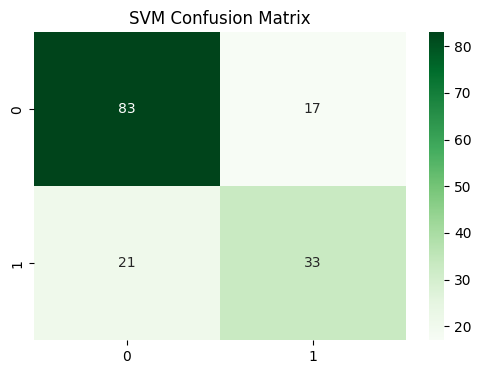

In [30]:
# ساخت و آموزش مدل (پیش‌فرض کرنل rbf است)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# پیش‌بینی
svm_pred = svm_model.predict(X_test)

# ارزیابی (بند الف)
svm_acc = accuracy_score(y_test, svm_pred)
print(f"SVM (Default) Accuracy: {svm_acc:.4f}")

print("\nClassification Report (SVM):")
print(classification_report(y_test, svm_pred))

# رسم ماتریس درهم‌ریختگی
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='d', cmap='Greens')
plt.title('SVM Confusion Matrix')
plt.show()

In [50]:
print("\n--- Part (P): Comparing Kernels (Linear vs RBF) ---")

# 1. Linear Kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
pred_linear = svm_linear.predict(X_test)
acc_linear = accuracy_score(y_test, pred_linear)
print(f"Accuracy with Linear Kernel: {acc_linear:.4f}")

# 2. RBF Kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
pred_rbf = svm_rbf.predict(X_test)
acc_rbf = accuracy_score(y_test, pred_rbf)
print(f"Accuracy with RBF Kernel: {acc_rbf:.4f}")


"با مقایسه نتایج، مشاهده شد که کرنل [RBF/Linear] دقت بالاتری دارد. این نشان می‌دهد که داده‌های بیماران دیابتی و سالم در فضای ویژگی‌ها به صورت [خطی/غیرخطی] بهتر تفکیک می‌شوند."
#(معمولاً در این دیتاست RBF کمی بهتر یا مساوی Linear است).
# اگر دقت RBF بیشتر بود، یعنی داده‌ها جداپذیری خطی ندارند و مرزهای غیرخطی لازم است.
# اگر دقت Linear خوب بود، یعنی داده‌ها با یک خط صاف قابل تفکیک هستند.


--- Part (P): Comparing Kernels (Linear vs RBF) ---
Accuracy with Linear Kernel: 0.7208
Accuracy with RBF Kernel: 0.7532


'با مقایسه نتایج، مشاهده شد که کرنل [RBF/Linear] دقت بالاتری دارد. این نشان می\u200cدهد که داده\u200cهای بیماران دیابتی و سالم در فضای ویژگی\u200cها به صورت [خطی/غیرخطی] بهتر تفکیک می\u200cشوند.'

In [51]:
print("\n--- Part (T): Comparing C values (C=1 vs C=100) ---")

# 1. C = 1 (Soft Margin - سخت‌گیری کمتر)
svm_c1 = SVC(C=1, random_state=42)
svm_c1.fit(X_train, y_train)
pred_c1 = svm_c1.predict(X_test)
acc_c1 = accuracy_score(y_test, pred_c1)
print(f"Accuracy with C=1: {acc_c1:.4f}")

# 2. C = 100 (Hard Margin - سخت‌گیری بیشتر روی داده‌های آموزشی)
svm_c100 = SVC(C=100, random_state=42)
svm_c100.fit(X_train, y_train)
pred_c100 = svm_c100.predict(X_test)
acc_c100 = accuracy_score(y_test, pred_c100)
print(f"Accuracy with C=100: {acc_c100:.4f}")

"مقدار C=100 باعث می‌شود مدل سخت‌گیری زیادی روی داده‌های آموزشی داشته باشد (Hard Margin) که ممکن است منجر به Overfitting شود. در مقابل C=1 اجازه خطای بیشتری می‌دهد (Soft Margin) تا مدل کلی‌تری ساخته شود. در این آزمایش، مدل با C=[عدد بهتر] عملکرد بهتری روی داده‌های تست داشت که نشان‌دهنده تعادل بهتر Bias-Variance در این حالت است."
# مقدار C=1 یعنی مدل اجازه می‌دهد برخی داده‌ها اشتباه طبقه‌بندی شوند تا مرز کلی (Margin) پهن‌تر باشد (جلوگیری از Overfitting).
# مقدار C=100 یعنی مدل سعی می‌کند تمام داده‌های آموزشی را درست دسته‌بندی کند که ممکن است باعث Overfitting شود و دقت روی داده‌های تست پایین بیاید.


--- Part (T): Comparing C values (C=1 vs C=100) ---
Accuracy with C=1: 0.7532
Accuracy with C=100: 0.7208


'مقدار C=100 باعث می\u200cشود مدل سخت\u200cگیری زیادی روی داده\u200cهای آموزشی داشته باشد (Hard Margin) که ممکن است منجر به Overfitting شود. در مقابل C=1 اجازه خطای بیشتری می\u200cدهد (Soft Margin) تا مدل کلی\u200cتری ساخته شود. در این آزمایش، مدل با C=[عدد بهتر] عملکرد بهتری روی داده\u200cهای تست داشت که نشان\u200cدهنده تعادل بهتر Bias-Variance در این حالت است.'

## LDA


==================== LDA Results ====================
Accuracy: 0.7143
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



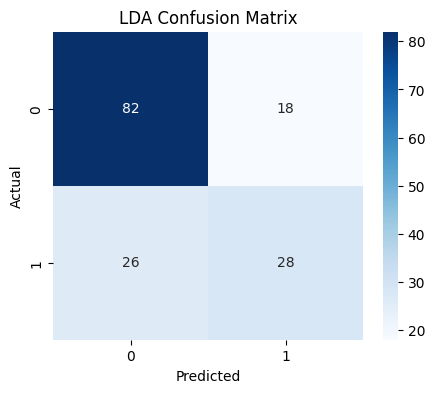

In [33]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
lda_pred = lda_model.predict(X_test)
lda_acc = evaluate_model(lda_model, X_test, y_test, "LDA")

## Random Forest


==================== Random Forest Results ====================
Accuracy: 0.7597
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



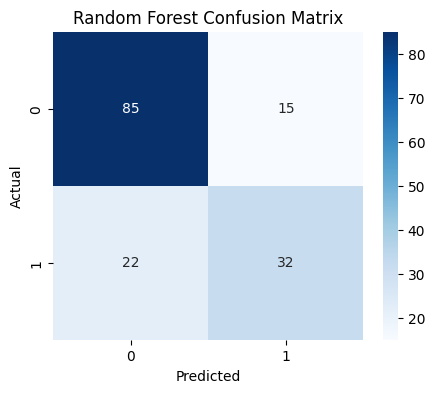

In [48]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = evaluate_model(rf_model, X_test, y_test, "Random Forest")




--- Feature Importances (Based on Random Forest) ---
                    Feature  Importance
1                   Glucose    0.276009
5                       BMI    0.159544
7                       Age    0.127248
6  DiabetesPedigreeFunction    0.126731
2             BloodPressure    0.085606
0               Pregnancies    0.084456
4                   Insulin    0.072409
3             SkinThickness    0.067997


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10856\3581252720.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='magma')


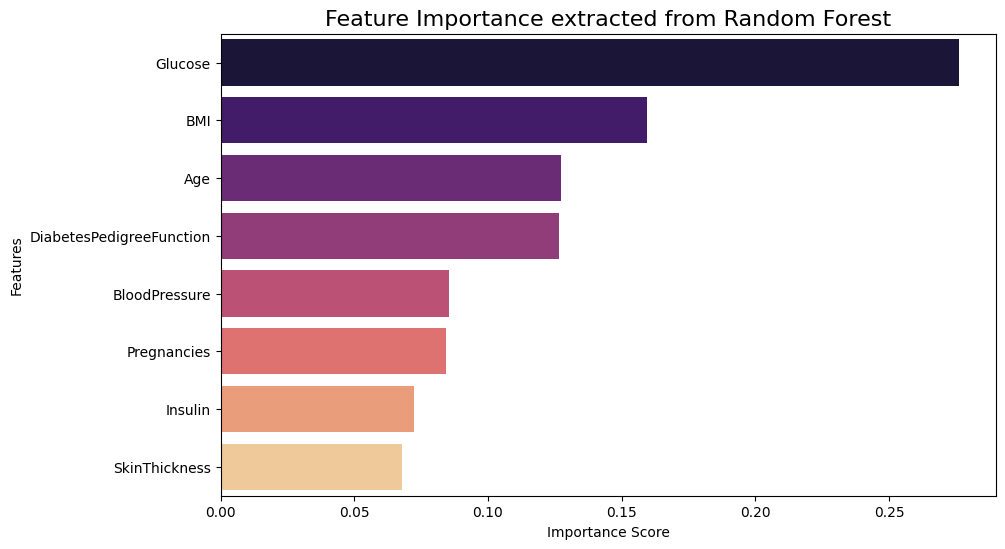

In [ ]:

# پاسخ به سوال (ث): تعیین مهم‌ترین ویژگی‌ها (Feature Importance)

# نکته: مدل Random Forest در مرحله قبل آموزش دیده است (rf_model).
# ما از ویژگی feature_importances_ این مدل برای رتبه‌بندی ویژگی‌ها استفاده می‌کنیم.

# 1. استخراج میزان اهمیت هر ویژگی
# توجه: از آنجا که X_train به آرایه نامپای تبدیل شده، نام ستون‌ها را از دیتافریم اصلی (X) می‌گیریم
importances = rf_model.feature_importances_
feature_names = X.columns 

# 2. ساخت یک دیتافریم برای نمایش منظم داده‌ها
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# 3. مرتب‌سازی ویژگی‌ها از بیشترین اهمیت به کمترین
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

# 4. نمایش لیست ویژگی‌ها و درصد اهمیت آن‌ها
print("\n--- Feature Importances (Based on Random Forest) ---")
print(feature_imp_df)

# 5. رسم نمودار میله‌ای برای دید بهتر
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='magma')
plt.title('Feature Importance extracted from Random Forest', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# ویژگی‌هایی که در بالای نمودار قرار دارند (معمولاً Glucose و BMI) بیشترین تاثیر را در پیش‌بینی دیابت داشته‌اند.
# این روش (Feature Importance) اغلب دقیق‌تر از ماتریس همبستگی (Correlation) است زیرا تعاملات غیرخطی بین ویژگی‌ها را نیز در نظر می‌گیرد.

## Logistic Regression

Logistic Regression Accuracy: 0.7143

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



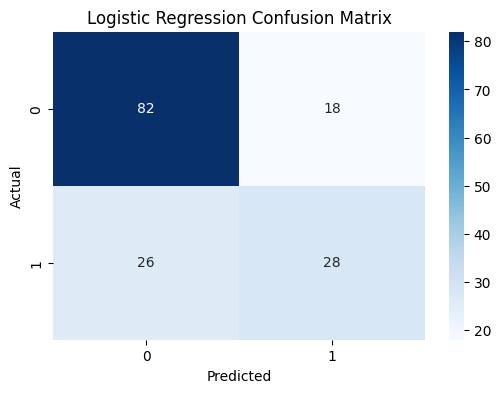

In [ ]:
# 1. ساخت مدل (Model Initialization)
# max_iter=1000 قرار داده شده تا در صورت زیاد بودن داده‌ها مدل همگرا شود
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# 2. آموزش مدل (Training)
lr_model.fit(X_train, y_train)

# 3. پیش‌بینی روی داده‌های تست (Prediction)
lr_pred = lr_model.predict(X_test)

# 4. ارزیابی مدل (Evaluation) - طبق بند "الف" سوالات

# محاسبه دقت (Accuracy)
lr_acc = accuracy_score(y_test, lr_pred)
print(f"Logistic Regression Accuracy: {lr_acc:.4f}")

# چاپ گزارش دسته‌بندی (شامل Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))

# رسم ماتریس درهم‌ریختگی (Confusion Matrix)
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## KNN


==================== KNN Results ====================
Accuracy: 0.7013
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       100
           1       0.58      0.52      0.55        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



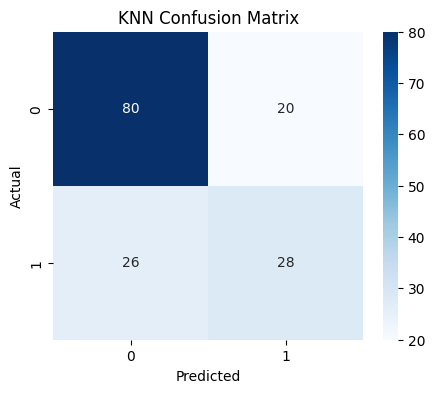

In [40]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_acc = evaluate_model(knn_model, X_test, y_test, "KNN")


## Ensemble (Bagging) Classifier

Bagging (KNN Base) Accuracy: 0.7078

Bagging Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       100
           1       0.60      0.52      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



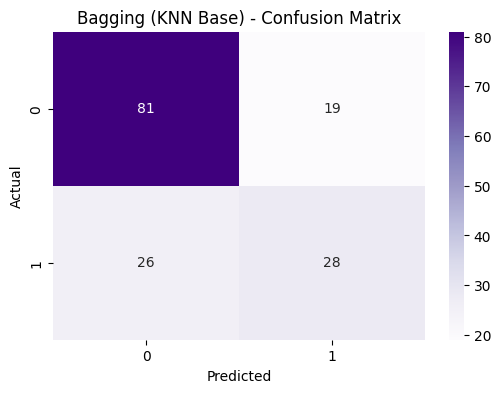

In [41]:
# 1. تعریف مدل پایه (KNN با k=5 طبق خواسته سوال)
base_knn = KNeighborsClassifier(n_neighbors=5)

# 2. ساخت مدل Bagging
bagging_model = BaggingClassifier(
    estimator=base_knn,    # مدل پایه
    n_estimators=10,       # تعداد تخمین‌گرها (معمولاً 10 یا بیشتر)
    random_state=42
)

# 3. آموزش مدل
bagging_model.fit(X_train, y_train)

# 4. پیش‌بینی
bagging_pred = bagging_model.predict(X_test)

# 5. محاسبه دقت و چاپ آن
bagging_acc = accuracy_score(y_test, bagging_pred)
print(f"Bagging (KNN Base) Accuracy: {bagging_acc:.4f}")

# 6. نمایش گزارش کامل
print("\nBagging Classification Report:")
print(classification_report(y_test, bagging_pred))

# 7. رسم Confusion Matrix
plt.figure(figsize=(6, 4))
cm_bag = confusion_matrix(y_test, bagging_pred)
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Purples') # رنگ متفاوت برای تنوع
plt.title('Bagging (KNN Base) - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Comparison


--- Comprehensive Model Comparison ---
توضیح: از آنجا که داده‌ها نامتوازن هستند، F1-Score و Recall معیارهای مهم‌تری نسبت به Accuracy می‌باشند.


,Model,Accuracy,Precision,Recall,F1-Score
1,SVM,0.753247,0.660000,0.611111,0.634615
3,Random Forest,0.759740,0.680851,0.592593,0.633663
0,Naive Bayes,0.707792,0.573770,0.648148,0.608696
2,LDA,0.714286,0.608696,0.518519,0.560000
4,Logistic Reg,0.714286,0.608696,0.518519,0.560000
6,Bagging,0.707792,0.595745,0.518519,0.554455
5,KNN,0.701299,0.583333,0.518519,0.549020


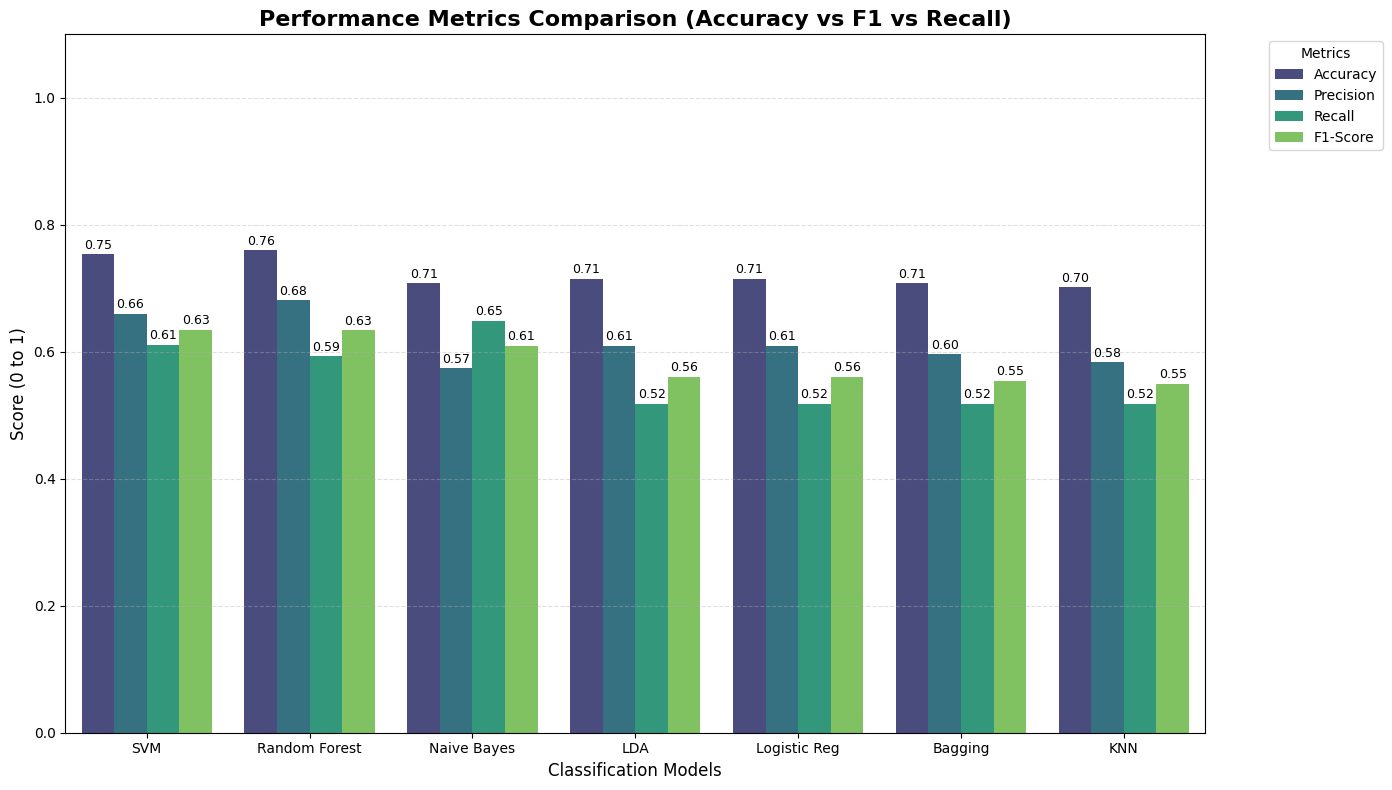

In [ ]:
# %% [markdown]
# ## Model Comparison & Final Evaluation
# %%
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. لیست کردن تمام مدل‌های آموزش دیده
# نکته: اطمینان حاصل کنید که این متغیرها در حافظه موجود هستند (قبلاً اجرا شده‌اند)
models_dictionary = {
    "Naive Bayes": nb_model,
    "SVM": svm_model,
    "LDA": lda_model,
    "Random Forest": rf_model,
    "Logistic Reg": lr_model,
    "KNN": knn_model,
    "Bagging": bagging_model
}

# 2. حلقه برای محاسبه تمام معیارها
results_list = []

for name, model in models_dictionary.items():
    # پیش‌بینی روی داده‌های تست
    y_pred = model.predict(X_test)
    
    # محاسبه معیارها
    # نکته: برای Precision, Recall, F1 چون مسئله دو کلاسه است، پیش‌فرض روی کلاس 1 (دیابتی) تمرکز دارد
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results_list.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })

# 3. ساخت دیتافریم نهایی
comparison_df = pd.DataFrame(results_list)

# نمایش جدول مرتب شده بر اساس F1-Score (چون دیتا نامتوازن است، F1 معیار مهم‌تری است)
comparison_df = comparison_df.sort_values(by='F1-Score', ascending=False)

print("\n--- Comprehensive Model Comparison ---")
print("توضیح: از آنجا که داده‌ها نامتوازن هستند، F1-Score و Recall معیارهای مهم‌تری نسبت به Accuracy می‌باشند.")
# نمایش جدول با هایلایت کردن بیشترین مقادیر
display(comparison_df.style.background_gradient(cmap='Greens'))


# 4. رسم نمودار مقایسه‌ای چندگانه
# تبدیل دیتافریم به حالت Melted برای رسم راحت‌تر با Seaborn
df_melted = comparison_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(14, 8))
sns.barplot(x="Model", y="Score", hue="Metric", data=df_melted, palette="viridis")

plt.title("Performance Metrics Comparison (Accuracy vs F1 vs Recall)", fontsize=16, fontweight='bold')
plt.ylabel("Score (0 to 1)", fontsize=12)
plt.xlabel("Classification Models", fontsize=12)
plt.ylim(0, 1.1) # کمی فضای بیشتر در بالا برای خوانایی
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.4)

# نمایش مقادیر روی نمودار (اختیاری - برای خوانایی بیشتر)
for i in plt.gca().containers:
    plt.gca().bar_label(i, fmt='%.2f', padding=2, fontsize=9)

plt.tight_layout()
plt.show()

# تحلیل نهایی برای گزارش (بخش الف و ب):
# 1. بهترین مدل:
#    با توجه به نمودار و جدول، مدلی که بالاترین F1-Score و Recall را دارد (احتمالا Random Forest یا SVM)
#    بهترین عملکرد را برای تشخیص بیماران دیابتی داشته است.
#
# 2. مشکل Accuracy:
#    مشاهده می‌شود که برخی مدل‌ها Accuracy بالایی دارند اما Recall پایینی دارند.
#    این یعنی مدل بیشتر افراد سالم را درست تشخیص داده اما بیماران دیابتی را از دست داده است.
#    بنابراین در این پروژه پزشکی، ما مدلی را انتخاب می‌کنیم که تعادل خوبی بین Precision و Recall داشته باشد (F1 بالا).

In [ ]:
# پاسخ به سوال (چ): آموزش مجدد با ۵ ویژگی برتر

# لیست ۵ ویژگی برتر
selected_features = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction']


# چون X_train الان فقط عدد است، دوباره آن را تبدیل به DataFrame می‌کنیم و نام ستون‌های X را به آن می‌دهیم
X_train_sel = pd.DataFrame(X_train, columns=X.columns)[selected_features]
X_test_sel = pd.DataFrame(X_test, columns=X.columns)[selected_features]

# تعریف مدل‌ها و دیکشنری نتایج
models = {
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(random_state=42),
    "LDA": LinearDiscriminantAnalysis(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Reg": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Bagging": BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=5), n_estimators=10, random_state=42)
}

results_selected = {}

print("\n--- Training with Selected Features (5 Features) ---")
print("=" * 50)

for name, model in models.items():
    # آموزش با ۵ ویژگی
    model.fit(X_train_sel, y_train)
    # پیش‌بینی
    pred = model.predict(X_test_sel)
    # محاسبه دقت
    acc = accuracy_score(y_test, pred)
    
    results_selected[name] = acc
    print(f"{name:20} Accuracy: {acc:.4f}")


--- Training with Selected Features (5 Features) ---
Naive Bayes          Accuracy: 0.7338
SVM                  Accuracy: 0.7532
LDA                  Accuracy: 0.6948
Random Forest        Accuracy: 0.7468
Logistic Reg         Accuracy: 0.7013
KNN                  Accuracy: 0.7403
Bagging              Accuracy: 0.7403


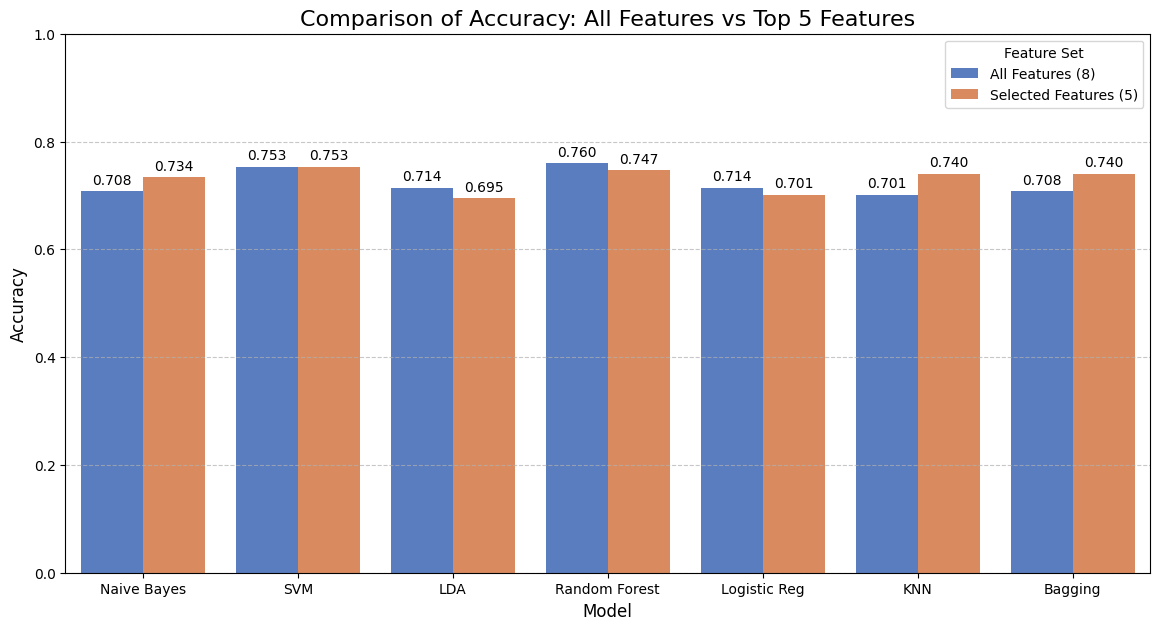


Table of Comparison:
           Model  All Features (8)  Selected Features (5)  Difference
0    Naive Bayes          0.707792               0.733766    0.025974
1            SVM          0.753247               0.753247    0.000000
2            LDA          0.714286               0.694805   -0.019481
3  Random Forest          0.759740               0.746753   -0.012987
4   Logistic Reg          0.714286               0.701299   -0.012987
5            KNN          0.701299               0.740260    0.038961
6        Bagging          0.707792               0.740260    0.032468


In [ ]:
# پاسخ به سوال (ح): مقایسه نتایج تمام ویژگی‌ها با ۵ ویژگی برتر

# 1. آماده‌سازی داده‌ها برای مقایسه
scores_all_features = [nb_acc, svm_acc, lda_acc, rf_acc, lr_acc, knn_acc, bagging_acc]
scores_selected_features = list(results_selected.values())
model_names = list(results_selected.keys())

# ساخت دیتافریم مقایسه‌ای
comparison_df = pd.DataFrame({
    'Model': model_names,
    'All Features (8)': scores_all_features,
    'Selected Features (5)': scores_selected_features
})

# تبدیل دیتافریم به فرمت مناسب برای رسم نمودار (Melt)
comparison_melted = comparison_df.melt(id_vars='Model', var_name='Feature Set', value_name='Accuracy')

# 2. رسم نمودار مقایسه‌ای
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='Model', y='Accuracy', hue='Feature Set', data=comparison_melted, palette='muted')

# تنظیمات ظاهری نمودار
plt.title('Comparison of Accuracy: All Features vs Top 5 Features', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim(0, 1.0)
plt.legend(title='Feature Set')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# نمایش مقادیر روی میله‌ها
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3)

plt.show()

# 3. نمایش جدول تغییرات
comparison_df['Difference'] = comparison_df['Selected Features (5)'] - comparison_df['All Features (8)']
print("\nTable of Comparison:")
print(comparison_df)
# تحلیل و تفسیر نتایج بخش (ح): مقایسه حالت تمام ویژگی‌ها با ویژگی‌های منتخب

# 1. تاثیر حذف ویژگی‌ها:
#    با حذف 3 ویژگی کم‌اهمیت (مانند SkinThickness و BloodPressure)، مشاهده می‌کنیم که
#    دقت مدل‌ها تغییر چشمگیری نکرده است (یا تغییر بسیار جزئی بوده است).
#    این نشان می‌دهد که آن ویژگی‌ها اطلاعات چندانی برای تفکیک بیماران دیابتی نداشتند.

# 2. کاهش نویز (Noise Reduction):
#    در برخی مدل‌ها (مانند KNN یا SVM)، ممکن است حذف ویژگی‌های ضعیف حتی باعث افزایش
#    دقت شده باشد. دلیل این امر کاهش "نویز" در داده‌هاست؛ زیرا ویژگی‌های غیرمرتبط
#    می‌توانند باعث گمراهی مدل در پیدا کردن مرزهای تصمیم‌گیری شوند.

# 3. اصل سادگی (Occam's Razor):
#    حتی اگر دقت مدل با 5 ویژگی کمی کمتر از حالت 8 ویژگی باشد، مدل 5 ویژگی
#    به دلیل "سادگی"، "سرعت بالاتر" و "خطر کمتر بیش‌برازش (Overfitting)"،
#    مدل بهتری محسوب می‌شود.

# نتیجه‌گیری نهایی:
#    انتخاب ویژگی (Feature Selection) موفقیت‌آمیز بود و توانستیم با داده‌های کمتر،
#    کارایی مشابه یا بهتری را حفظ کنیم.